In [1]:
import pandas as pd
data = pd.read_csv("Dataset/diabetes_dataset.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Feature Selection

In [2]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']
X,y


(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

Splitting Data

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train, X_test, y_train, y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 603            7      150             78             29      126  35.2   
 118            4       97             60             23        0  28.2   
 247            0      165             90             33      680  52.3   
 157            1      109             56             21      135  25.2   
 468            8      120              0              0        0  30.0   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 192            7      159             66              0        0  30.4   
 629            4       94             65             22        0  24.7   
 559           11       85             74              0        0  30.1   
 684            5      136             82              0        0   0.0   
 
      DiabetesPedigreeFunction  Age  
 603                     0.692   54  
 118                  

Decision Tree Model

In [4]:
# Building Decision Tree Model Let's create a Decision Tree Model using Scikit-learn.
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)
     

In [5]:
#Evaluation using Accuracy score
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)*100

79.87012987012987

In [6]:
#Evaluation using Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[89, 18],
       [13, 34]], dtype=int64)

In [7]:
# Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       107
           1       0.65      0.72      0.69        47

    accuracy                           0.80       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.81      0.80      0.80       154



In [9]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from IPython.display import Image
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus

In [11]:
features = X.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

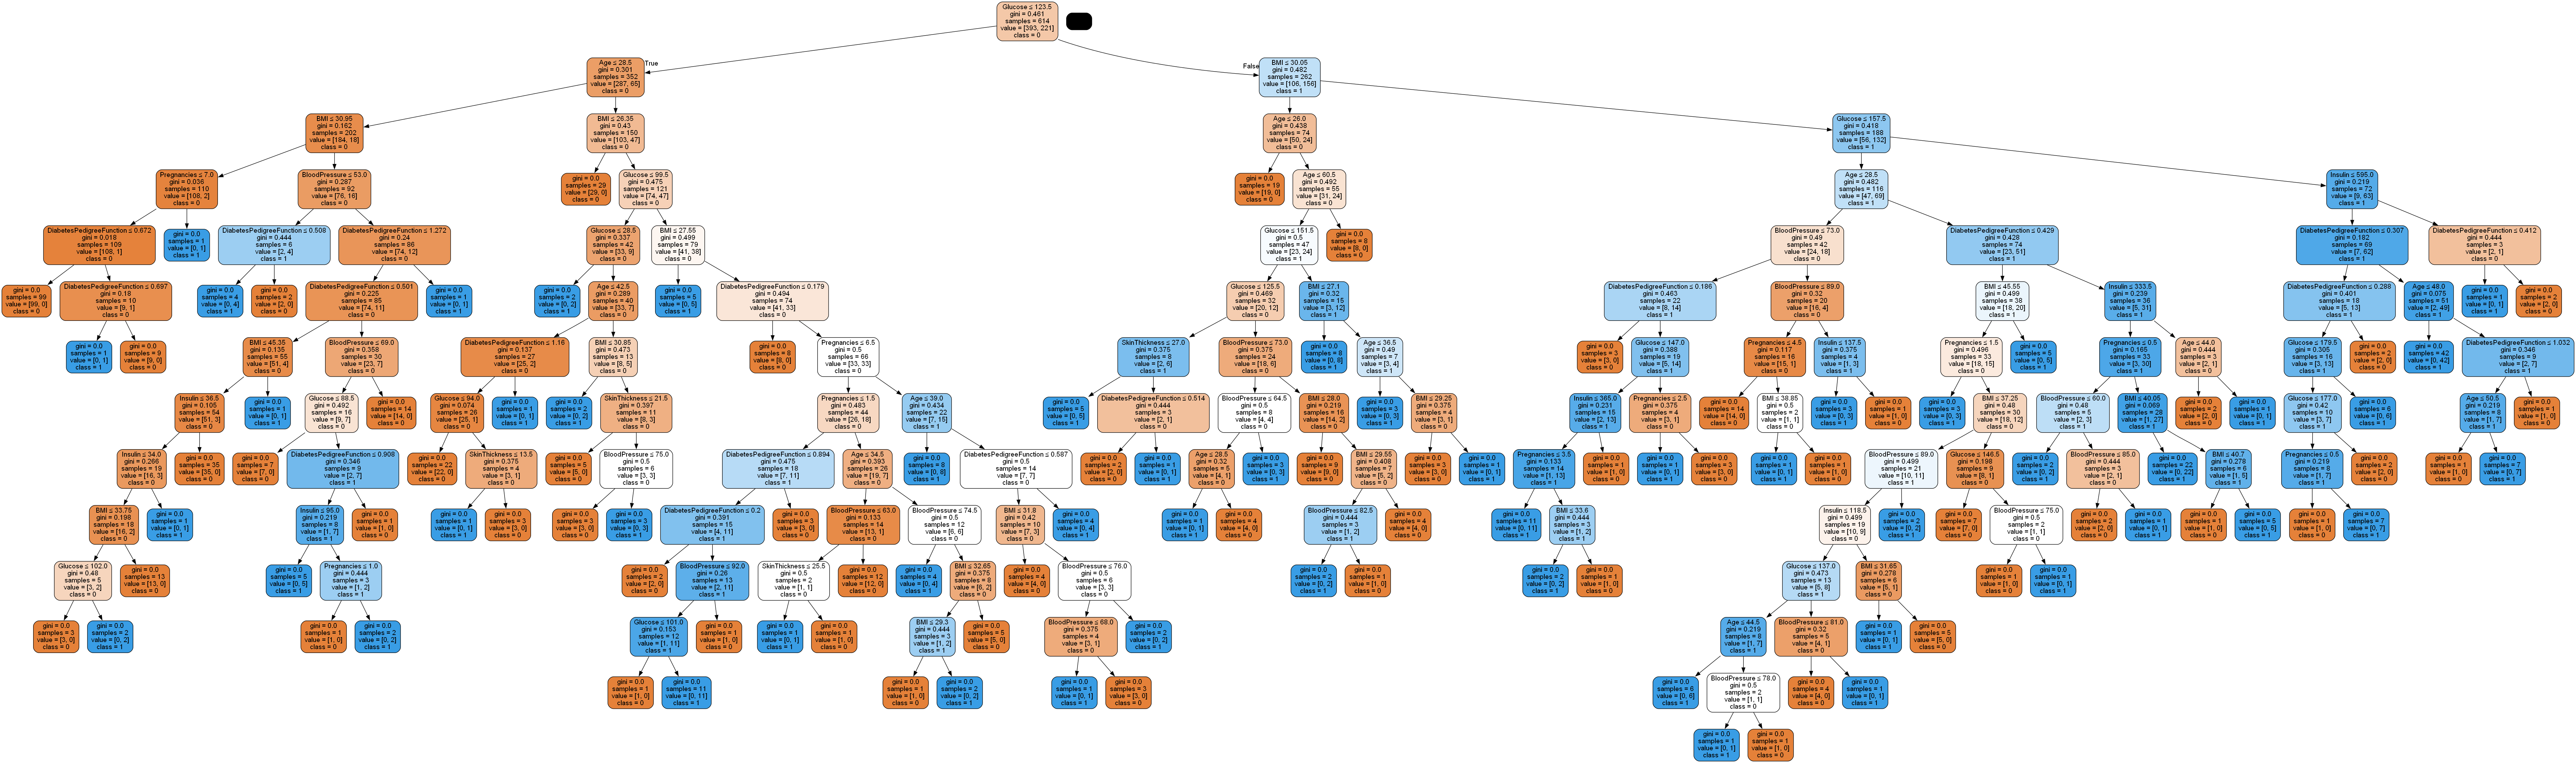

In [12]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('destinations.png')
Image(graph.create_png())